## Few Business questions that we are trying to answer with this data:
#### 1. Does most favoritized tweet has any pattern/ trend? <br> 2. Which countries are most people tweeting from? <br> 3. Most favoritized tweets? <br> 4. Most followed people and their description? <br> 5. What is the sentiment in peoples' tweet? <br> 6. Does the sentiment has any correlation with country?

## Import Libraries and Data Load

In [74]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os
import string
import re
from datetime import datetime
import matplotlib.pyplot as plt
import branca.colormap as cm
from mpl_toolkits.basemap import Basemap
import requests
import folium

#! pip install basemap
#! conda install -c conda-forge basemap-data-hires --yes

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None)

In [75]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-tweets/covid19_tweets.csv


In [76]:
df = pd.read_csv(os.path.join(dirname, filename))
df.head()

user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                                                                                                                            user_description  \
0                                                                            wednesday addams as a disney princess keepin it [̲̅$̲̅(̲̅ιοο̲̅)̲̅$̲̅] 👸🏻💚♊️🧀🌵🌃🌙   
1  Husband, Father, Columnist & Commentator. Author of Tough Sell: Fighting the Media War in Iraq. Bush Admin Alum. Newsmax Contributor. Fmr Exec Dir NYSGOP   
2                              #Christian #Catholic #Conservative #Reagan #Republican #Capitalist; Sports lover - #BBN #Cincinnati #Reds #Bengals #Trump2020   
3                                                                                                      #Browns #Indians #ClevelandProud #[]_[] #Cavs #Resist   
4                                                       🖊️Official Twitter handle of Department of Information and Public Relations, Govt of Jammu & Kashmir   

          user_created  user_followers  user_friends  user_favourites  \
0  2017-05-26 05:46:42             624           950            18775   
1  2009-04-16 20:06:23            2253          1677               24   
2  2009-02-28 18:57:41            9275          9525             7254   
3  2019-03-07 01:45:06             197           987             1488   
4  2017-02-12 06:45:15          101009           168              101   

   user_verified                 date  \
0          False  2020-07-25 12:27:21   
1           True  2020-07-25 12:27:17   
2          False  2020-07-25 12:27:14   
3          False  2020-07-25 12:27:10   
4          False  2020-07-25 12:27:08   

                                                                                                                                           text  \
0  If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0   
1  Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu   
2  @diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3   
3   @brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW   
4   25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… https://t.co/MN0EEcsJHh   

                            hashtags               source  is_retweet  
0                                NaN   Twitter for iPhone       False  
1                                NaN  Twitter for Android       False  
2                        ['COVID19']  Twitter for Android       False  
3                        ['COVID19']   Twitter for iPhone       False  
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android       False

## Exploration Data Analysis (EDA)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
sns.heatmap(df.corr())

## Detailed Analysis

In [77]:
# Make a copy of dataframe before making any changes
tweets = df.copy()

In [78]:
# Convert date columns to datetime data type from object
tweets['date'] = pd.to_datetime(tweets['date'])
tweets['user_created'] = pd.to_datetime(tweets['user_created'])
tweets['date_ext'] = tweets['date'].dt.date


In [79]:
# Take care of nulls in location and description
tweets.user_location.fillna('Unknown', inplace=True)
tweets.user_description.fillna('Unknown', inplace=True)
tweets.source.fillna('Unknown', inplace=True)
tweets.hashtags.fillna('None', inplace=True)

In [80]:
# Verify
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166656 entries, 0 to 166655
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_name         166656 non-null  object        
 1   user_location     166656 non-null  object        
 2   user_description  166656 non-null  object        
 3   user_created      166656 non-null  datetime64[ns]
 4   user_followers    166656 non-null  int64         
 5   user_friends      166656 non-null  int64         
 6   user_favourites   166656 non-null  int64         
 7   user_verified     166656 non-null  bool          
 8   date              166656 non-null  datetime64[ns]
 9   text              166656 non-null  object        
 10  hashtags          166656 non-null  object        
 11  source            166656 non-null  object        
 12  is_retweet        166656 non-null  bool          
 13  date_ext          166656 non-null  object        
dtypes: b

In [ ]:
# tweets.user_location.value_counts().to_frame().style.bar()

In [81]:
# Attempt tp clean the location column. There are many other business rules that can be applied to 
# improve the accuracy of different cases. We can also use regular expressions

# If both country and city is mentioned

tweets["country"] = tweets.user_location.apply(lambda x: x.split(",")[-1].strip() \
                                            if ("," in x) else x)
tweets["city"] = tweets.user_location.apply(lambda x: x.split(",")[0].strip() \
                                            if ("," in x) else x)

# Replacing 2 digit US states with USA except UK
tweets["country"] = tweets.country.apply(lambda x: 'USA' if len(x.lower().strip())<3 and x!='uk' else x)

# Standarizing case senstive cases
tweets["country"] = tweets.country.apply(lambda x: 'USA' if x.lower().strip() in \
                                      ("united states, usa, us") else x)
tweets["country"] = tweets.country.apply(lambda x: 'India' if x.lower().strip() in \
                                      ("india") else x)

In [82]:
tweets.country.value_counts().to_frame().style.bar()

#### We are able to confirm that US and India are the top countries from where most of the people have tweeted with USA being significantly higher

In [83]:
tweets["city"] = tweets.city.apply(lambda x: 'Unknown' if x.lower() in \
                                   ['india', 'united states', 'united kingdom', 'uk', 'usa', 'us'] \
                                   else x)

In [ ]:
tweets.city.value_counts()
#.to_frame().style.bar()

#### The top 5 cities with highest tweets are seen to be London, New Delhi, New York, Mumbai, Washington.

## Let's see the geographical distribution based on number of tweets

In [84]:
# Taking top 10 excluding the unknown at index 0
top100_count = tweets.country.value_counts(sort=True, ascending=False)[1:101]
top100_count = pd.DataFrame(top100_coun)

In [85]:
top100_count.head()

country
USA        31230
India      12782
England     3595
Canada      2000
Nigeria     1974

In [86]:
def get_boundingbox_country(country, output_as='center'):
    """
    get the bounding box of a country in EPSG4326 given a country name

    Parameters
    ----------
    country : str
        name of the country in english and lowercase
    output_as : 'str
        chose from 'boundingbox' or 'center'. 
         - 'boundingbox' for [latmin, latmax, lonmin, lonmax]
         - 'center' for [latcenter, loncenter]

    Returns
    -------
    output : list
        list with coordinates as str
    """
    # create url
    url = '{0}{1}{2}'.format('http://nominatim.openstreetmap.org/search?country=',
                             country,
                             '&format=json&polygon=0')
    
    response = requests.get(url)
    try:
        response = response.json()[0]
        # parse response to list
        if output_as == 'boundingbox':
            lst = response[output_as]
            output = [float(i) for i in lst]
        if output_as == 'center':
            lst = [response.get(key) for key in ['lat','lon']]
            output = [float(i) for i in lst]
        return output
    
    except (IndexError, ValueError):
        # this will log the whole traceback
        return [0,0]

In [298]:
# Calculate lat and long for top 100 countries and add to the top100_coun dataframe
lat_long = [get_boundingbox_country(coun) for coun in top100_count.index]
for i, pair in zip(top100_count.index, lat_long):
    top100_count.loc[i,'lat'] = pair[0]
    top100_count.loc[i,'long'] = pair[1]  

# reset the index as country names
top100_count.reset_index(level=0, inplace=True)
top100_count.rename(columns={"index":"country","country":"# of tweets"}, inplace=True)

# drop the countries with unidetified latitudes and longitudes
#len(top100_coun.query("lat==0" and "long==0")), len(top100_coun)
top100_coun.drop(top100_count.query("lat==0" and "long==0").index, inplace = True)
top100_coun.drop_duplicates(subset=['lat','long'],inplace=True)

NameError: name 'top100_count' is not defined

In [ ]:
"""
# Create a heatmap using Basemap
# initiate the figure with it's size
fig = plt.figure(figsize = (20,30))

# initialize the Basemap with appropriate arguments
map = Basemap(projection='cyl',resolution='l', llcrnrlat=-90, urcrnrlat=90,llcrnrlon=-180, urcrnrlon=180)
map.shadedrelief()
map.drawcoastlines()
map.drawcountries()
#map.etopo
#map.drawstates()
#map.drawmapboundary()

# Convert to map projection coords since lon,lat can be scalars, lists or numpy arrays
x,y = map(top100_count['lat'].values, top100_count['long'].values)
#print("x:", x,"y: ",y)
# Scatter plot with latitude and longitude values customizing color with median_house_value and median_income
map.scatter(x,y,
            latlon = True,
            s = np.array(top100_count["# of tweets"].astype(int)),
            c = np.array(top100_count["# of tweets"].astype(float)),
            cmap = 'viridis', #cm.cool
            alpha=0.7,
            edgecolors = 'black')

for x,y,c in zip(x,y,top100_coun['country']):
    label = c
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center');
   
#put a colorbar
#plt.colorbar()

#save and show
# plt.savefig('matplotlib_plot.png')
plt.show();""" 
"""folium marker_cluster
base_map.add_child(plugins.MarkerCluster(locations=top100_coun[['lat','long']].values.tolist(),
                                 popups=top100_coun[['# of tweets']].values.tolist(),
                                 icon=print([folium.Icon(color=color(m)).to_json() \
                                       for m in top100_coun['# of tweets']])
                                      ))"""

In [310]:
# Create a heatmap using folium
from folium import plugins
from folium.plugins import HeatMap

def generateBaseMap(default_location=[40.693943, -73.985880], default_zoom_start=2):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

def color(magnitude):
    if magnitude>=2000:
        col='red'
    elif (magnitude>=500 and magnitude<2000):
        col='beige'
    elif magnitude<500:
        col='green'
    return col

base_map = generateBaseMap()
marker_cluster = plugins.MarkerCluster().add_to(base_map)
HeatMap(data=top100_coun[['lat','long']].values.tolist(),radius=20,max_zoom=13).add_to(base_map)

for lat,lan,tweet,country in zip(top100_coun['lat'],top100_coun['long'],top100_coun['# of tweets'],top100_coun['country']): 
    # Marker() takes location coordinates as a list as an argument 
    folium.Marker(location=[lat,lan],popup = [country,tweet], 
                  icon= folium.Icon(color=color(tweet), 
                  icon_color='white', icon='twitter', prefix='fa')).add_to(marker_cluster)
                    
base_map

In [228]:
# We can see a lot of cases have been taken care of but of course there are many additional business 
# rules that can be applied to improve the accuracy but for now this should be sufficient
tweets[['user_location','country', 'city']].head(100)

user_location  \
0                                                                           astroworld   
1                                                                         New York, NY   
2                                                                     Pewee Valley, KY   
3                                                                 Stuck in the Middle    
4                                                                    Jammu and Kashmir   
5                                                                          Новоро́ссия   
6                                                                      Gainesville, FL   
7                                                                              Unknown   
8                                                                              Unknown   
9                                                           👇🏻location at link below👇🏻   
10                                                                             Unknown   
11                                                                    Dhaka,Bangladesh   
12  Hotel living - various cities!  Who needs a home when hotel living is so fabulous!   
13                                                                              Africa   
14                                                                           New Delhi   
15                                                                     Nagaland, India   
16                                                                             Unknown   
17                                                                            Brussels   
18                                                                             Unknown   
19                                                                        Florida, USA   
20                                                                             Unknown   
21                                                                       #AFRICA #MENA   
22                                                                   Northwest Indiana   
23                                                                      100+ countries   
24                                                                                Graz   
25                                                                       Mumbai, India   
26                                                           Working in 175+ countries   
27                                                                       Manhattan, NY   
28                                                       no e-pass to cross borders...   
29                                                                    I ♥️ I ♥️ I ♥️ I   
30                                                                       United States   
31                                                                      Chennai, India   
32                                                                           Miami, FL   
33                                                            British Columbia, Canada   
34                                                                     Farnham, Surrey   
35                                                                        South Africa   
36                                                                    Deep Heart Texas   
37                                                                             Unknown   
38                                                                          Dorset, UK   
39                                                                  Bethesda, Maryland   
40                                                                      Cavan, Ireland   
41                                                          A UK I no longer recognise   
42                                                        Port Elizabeth, South Africa   
43                                                                    New Delhi, India   
44                     

In [ ]:
tweets.info()

In [222]:
# Compare the tweet source
top10_source = tweets.source.value_counts().nlargest(10)
top10_source

Twitter Web App        53097
Twitter for Android    37264
Twitter for iPhone     32904
TweetDeck               8067
Hootsuite Inc.          6951
Twitter for iPad        3979
Buffer                  2600
Sprout Social           1716
Instagram               1640
IFTTT                   1439
Name: source, dtype: int64

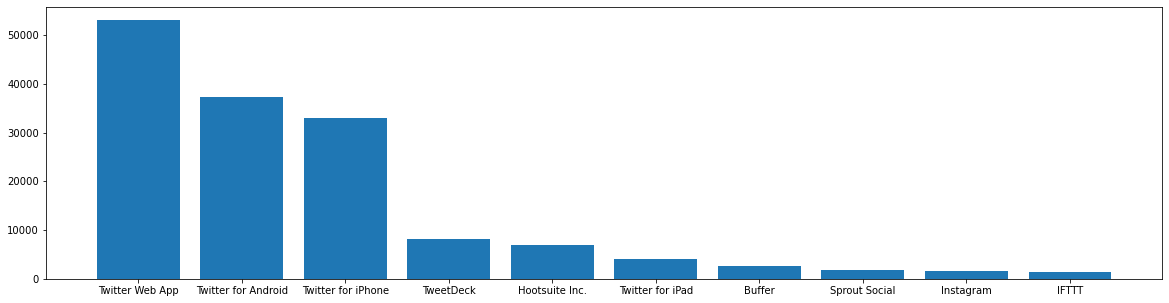

In [223]:
# initiate the figure with it's size
fig = plt.figure(figsize = (20,5))
plt.bar(top10_source.index, top10_source.values);

In [224]:
# Most trended hashtags
top10_hashtags = tweets.hashtags.str.lower().value_counts().nlargest(10)
top10_hashtags

none                                                                      47739
['covid19']                                                               42558
['coronavirus', 'covid19']                                                 1279
['covid19', 'coronavirus']                                                  842
['coronavirus']                                                             801
['coronavirus', 'coronavirusupdate', 'covid19', 'coronaviruspandemic']      550
['coronavirusupdates', 'covid19']                                           319
['indiafightscorona', 'covid19']                                            194
['covid19', 'pandemic']                                                     170
['india', 'covid19']                                                        158
Name: hashtags, dtype: int64

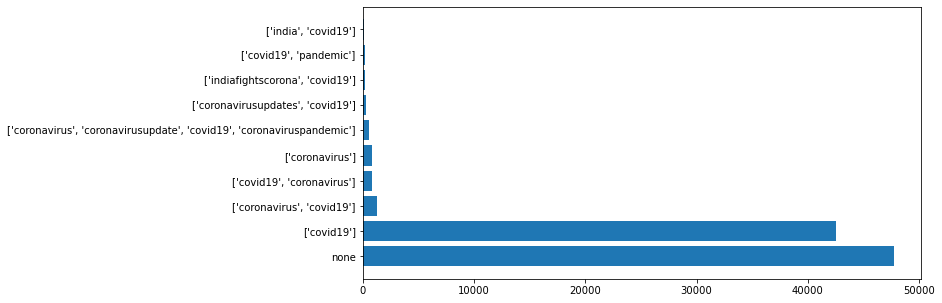

In [225]:
# initiate the figure with it's size
fig = plt.figure(figsize = (10,5))
plt.barh(top10_hashtags.index, top10_hashtags.values);
#plt.xticks(rotation=90);

In [ ]:
daily_tweets = tweets.groupby(['date_ext'])['text'].count()
daily_tweets

In [ ]:
# Daily tweet trend
fig = plt.figure(figsize = (10,5))
plt.plot(daily_tweets.index,daily_tweets.values)
plt.title('Daily Tweets Trend')
plt.xlabel('Dates')
plt.ylabel('# of Tweets')
plt.show()

In [ ]:
# five largest values in column tweets 
tweets.nlargest(5, ['user_favourites']) 

## Check sentiment of tweets
### Step 1: Preprocessing text

In [ ]:
#from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk import pos_tag, ne_chunk
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
# Normalize the text, convert everything other than a-z, A-Z, 0-9 to space
tweets['nor_text'] = tweets['text'].apply(lambda x: re.sub(r"[^a-zA-Z0-9]"," ", x))

In [ ]:
# Tokenize the normalized texts using TweetTokenizer which is specifically for tweets
tt = TweetTokenizer()
tweets['tokenized_text'] = tweets['nor_text'].apply(tt.tokenize)
#word_tokenize

In [ ]:
# Remove stopwords
tweets['stopwords_text'] = tweets['tokenized_text'].\
    apply(lambda x: [item for item in x if item not in stopwords.words("english")])

In [ ]:
# Identify the part of speech for all the tweets
# tweets['pos_text'] = tweets['stopwords_text'].apply(pos_tag)
# tweets['ne_text'] = tweets['pos_text'].apply(ne_chunk)

In [ ]:
# trying both stemming and lemmatization to compare and work with the more accurate one
# tweets['stem_text'] = tweets['stopwords_text'].apply(lambda x: [PorterStemmer().stem(w) for w in x])
tweets['lemm_text'] = tweets['stopwords_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(w) \
                                                                for w in x])

In [ ]:
"""# wordcloud
    comparison.cloud(colors=my_colors[c(5, 1)], max.words = 150, title.size = 2,
                  scale = c(3,.5))"""

### Step 2: Feature Extraction

In [ ]:
"""nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def get_score(text):
    dict_res = sid.polarity_scores(text)
    return dict_res["compound"]

df["Score"] = df["text_clean"].apply(lambda x: get_score(x))  

df['date'] = pd.to_datetime(df['date'])
dates = np.array(df['date'])
indices = np.argsort(dates)[10000:]
window = 750

dates = dates[indices][window:]
values = np.array(df['Score'])[indices]
windows = pd.Series(values).rolling(window)
moving_averages = windows.mean()[window:]

plt.figure(figsize=(20,9))
plt.plot(dates, moving_averages, color='blue', label='Average Sentiment')
plt.title('Analysis of Tweets')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend();"""

In [ ]:
# check size of notebook
!ls -lh

## References
- https://stackoverflow.com/questions/44173624/how-to-apply-nltk-word-tokenize-library-on-a-pandas-dataf**rame-for-twitter-data
- https://basemaptutorial.readthedocs.io/en/latest/plotting_data.html#text
- https://zapcircle.net/geomapping-with-python/
- https://matplotlib.org/basemap/users/geography.html
- https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
- https://colab.research.google.com/drive/1HJB7UGj7YuUEJi-cKZRAr3O4Dlym2KrP#scrollTo=0H-uRYF1iIjS
- 
    